Connesso a gitpy (Python 3.8.10)

Overview
=======
This notebook documents how to run the python module (GITeps.py) to separates the source, propagation and site contributions from the Fourier Amplitude Spectra (FAS) of recorded S-waves; the equation system is solved without imposing any a-priori parametric models on the different terms..


**NOTE**: This notebook is only tested for a GNU/Linux distribution.

#### Setup

In [1]:
# -*- coding: utf-8 -*-
import os
import argparse
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from LibGit.ConfGITeps import Conf
from LibGit import GitResults
from LibGit import InputFas
from LibGit.FASInv import FASInv
from LibGit.utilities import valid_true_false,check_log

#### Add the arguments of the command line in the next cell

| Options    | Description | Default
| -------- | ------- | ------- 
| config  | configuration file in YAML format to set the Generalized Inversion of seismological records    | na
| log | log file in TXT format     |logGITeps.txt
| v    | Verbose mode (prints summary and other details)    | True


In [2]:
opts_str = "--config Conf_GITeps.yaml"

#### Creating an ArgumentParser object to hold all the command line arguments

In [3]:
synopsis = 'GITeps implements the Generalized Inversion Technique (GIT) to isolate the source, propagation and site contributions to ground shaking in the spectral domain.'
usage = "example: python GITeps.py --config /path/to/configfile.txt --log /path/to/logfile.txt"
p = argparse.ArgumentParser(description=synopsis + '\n' + usage)

#### Adding arguments

In [4]:
p.add_argument("--config", "--configuration_file", action="store", dest="configFile",  default=None, help="configuration file in YAML format to set the Generalized Inversion of seismological records")
p.add_argument("--log", "--log_file", action="store", dest="LogFile",  default="logGITeps.txt", help="log file in TXT format; Default=logGITeps.txt")
p.add_argument("--v", "--verbose", action="store", dest="verb", type=valid_true_false, default='True', help="Verbose mode (prints summary and other details). Default: True") 

_StoreAction(option_strings=['--v', '--verbose'], dest='verb', nargs=None, const=None, default='True', type=<function valid_true_false at 0x7f99ada7c310>, choices=None, help='Verbose mode (prints summary and other details). Default: True', metavar=None)

#### Parsing arguments

In [5]:
opts_str_lst = opts_str.replace("'", "").replace('=',' ').split(' ')
opts = p.parse_args(opts_str_lst)
print(opts) 

Namespace(LogFile='logGITeps.txt', configFile='Conf_GITeps.yaml', verb=True)


In [6]:
progname = "GITeps.py"
progname = progname.replace(".py", "")
configFile = opts.configFile
logFile = opts.LogFile
print("-----  GITeps: earthquake,path and sites   -----")
print("         Configuration file: ", configFile)
print("                   Log file: ", logFile)

-----  GITeps: earthquake,path and sites   -----
         Configuration file:  Conf_GITeps.yaml
                   Log file:  logGITeps.txt


##### Open a log file

In [7]:
log_file = open(logFile, "w")
confF,confL = check_log(logFile,configFile)

 Warning Log File logGITeps.txt exist !


#### Read the Configuration File

In [8]:
now = datetime.now()
dt_string_start = now.strftime("%d/%m/%Y %H:%M:%S")
s1 = " ---------------------- GITeps, Starting computation: {:s} ---------".format(dt_string_start)
log_file.write(s1)
log_file.write("\n")
print(s1)
s1 = "> Configuration File: {:s} ".format(configFile)
log_file.write(s1)
log_file.write("\n")
s1 = "> Log File: {:s} ".format(logFile)
log_file.write(s1)
log_file.write("\n")
cfg = Conf(configFile, log_file)

 ---------------------- GITeps, Starting computation: 06/06/2024 10:18:54 ---------
....... START reading Ymal Configuration File: Conf_GITeps.yaml 
-- Section GLOBAL --
> Job Name: GIT-trial 
> FAS  dir: /home/mariaclara/gitpy/FAS_CI/ 
> OUT  dir: /home/mariaclara/gitpy/GITOUT/ 
> WARNING Out Dir:  /home/mariaclara/gitpy/GITOUT/ Exist! 
> GUI: Na
> Plot_graph: TRUE 
> Save_graph: TRUE 
> Cmp: H 
> Mean: VECTORIAL 
> Fmin:    0.50 Hz
> Fmax:   26.00 Hz
> Min Mag:    1.50
> Max Mag:    6.50
-- Section DIST BIN --
> Type_bin:  LIN 
> Dist_min:     5.00 km
> Dist_max:   125.00 km
> Dist_step:    5.00 km
> N bin dist (LIN): 24 
> FileEventRed :  /home/mariaclara/gitpy/input_examples/remove_events.txt 
  Number of Removed Events:       2 
> FileStationRed :  /home/mariaclara/gitpy/input_examples/remove_stations.txt 
  Number of Removed Stations:       2 
> Type_sel:  FILE 
> Reference distance: 10.0 km 
> Weight_dref:    5 
> Vdref:  0.00000 
-- Section CONSTRAINTS SITES --
> N reference si

#### Read the Fourier Spectra Amplitudes

In [9]:
GitRes = GitResults(progname)   
inp = InputFas(cfg, log_file, GitRes, progname)

....... START reading FAS Dir: /home/mariaclara/gitpy/FAS_CI/ 
READING FAS: 
 TOTAL NUMBER OF FAS files (*.fas):          69
removed events: ['180502212007', '180502192110']
['IV.MOMA..', 'IT.AQG..']
removed stations: ['IV.MOMA..', 'IT.AQG..']
FAS:     1 /home/mariaclara/gitpy/FAS_CI/FAS_0.53.fas  0.530 Hz Ndat:       2351
removed events: ['180502212007', '180502192110']
['IV.MOMA..', 'IT.AQG..']
removed stations: ['IV.MOMA..', 'IT.AQG..']
FAS:     2 /home/mariaclara/gitpy/FAS_CI/FAS_0.56.fas  0.560 Hz Ndat:       2343
removed events: ['180502212007', '180502192110']
['IV.MOMA..', 'IT.AQG..']
removed stations: ['IV.MOMA..', 'IT.AQG..']
FAS:     3 /home/mariaclara/gitpy/FAS_CI/FAS_0.59.fas  0.590 Hz Ndat:       2332
removed events: ['180502212007', '180502192110']
['IV.MOMA..', 'IT.AQG..']
removed stations: ['IV.MOMA..', 'IT.AQG..']
FAS:     4 /home/mariaclara/gitpy/FAS_CI/FAS_0.63.fas  0.630 Hz Ndat:       2352
removed events: ['180502212007', '180502192110']
['IV.MOMA..', 'IT.AQG..']


#### Start the FAS inversion

In [10]:
inve = FASInv(log_file, cfg, GitRes, inp)
for i in range(inp.nf):        
    inve.DoInversion(i)

....... START Inversion Freq:    0.53 Hz  Nf: 1 
        Nstat: 53 Nevt: 208 Nbin_Dist: 24 Tot Un: 285
        End data kernel nrow: 2351  len(b): 2351 
        Site constraints, Iref: 1  Num ref site: 6, Total site ref site:  6
        End site constraints nrow: 2352  len(b): 2352 
        End  dref constraint nrow: 2353  len(b): 2353 
        End  Bin  Distance Smooth: 2375  len(b): 2375 
        End Sparse Matrix construction, nrow:       2375 ncol:        285 Sparsity:   98.6 % len(b): 2375
        LSQR INVERSION....
        End LSQR INVERSION Stop Cond: 2 Niter: 205 R1norm:  12.411
....... END Inversion Freq:    0.53 Hz
....... START Inversion Freq:    0.56 Hz  Nf: 2 
        Nstat: 53 Nevt: 208 Nbin_Dist: 24 Tot Un: 285
        End data kernel nrow: 2343  len(b): 2343 
        Site constraints, Iref: 1  Num ref site: 6, Total site ref site:  6
        End site constraints nrow: 2344  len(b): 2344 
        End  dref constraint nrow: 2345  len(b): 2345 
        End  Bin  Distance S

#### Save Outputs

  WARNING Out Dir:  /home/mariaclara/gitpy/GITOUT/GRAPH Exist! 
  WARNING Out Dir:  /home/mariaclara/gitpy/GITOUT/GRAPH Exist! 
  File for attenuation:  /home/mariaclara/gitpy/GITOUT/Attenuation.txt
  WARNING Out File:  /home/mariaclara/gitpy/GITOUT/Attenuation.txt Exist .... Overwrite 
  Plot Non Parametric attenuation curves.....
  Graphic file for attenuation:  /home/mariaclara/gitpy/GITOUT/GRAPH


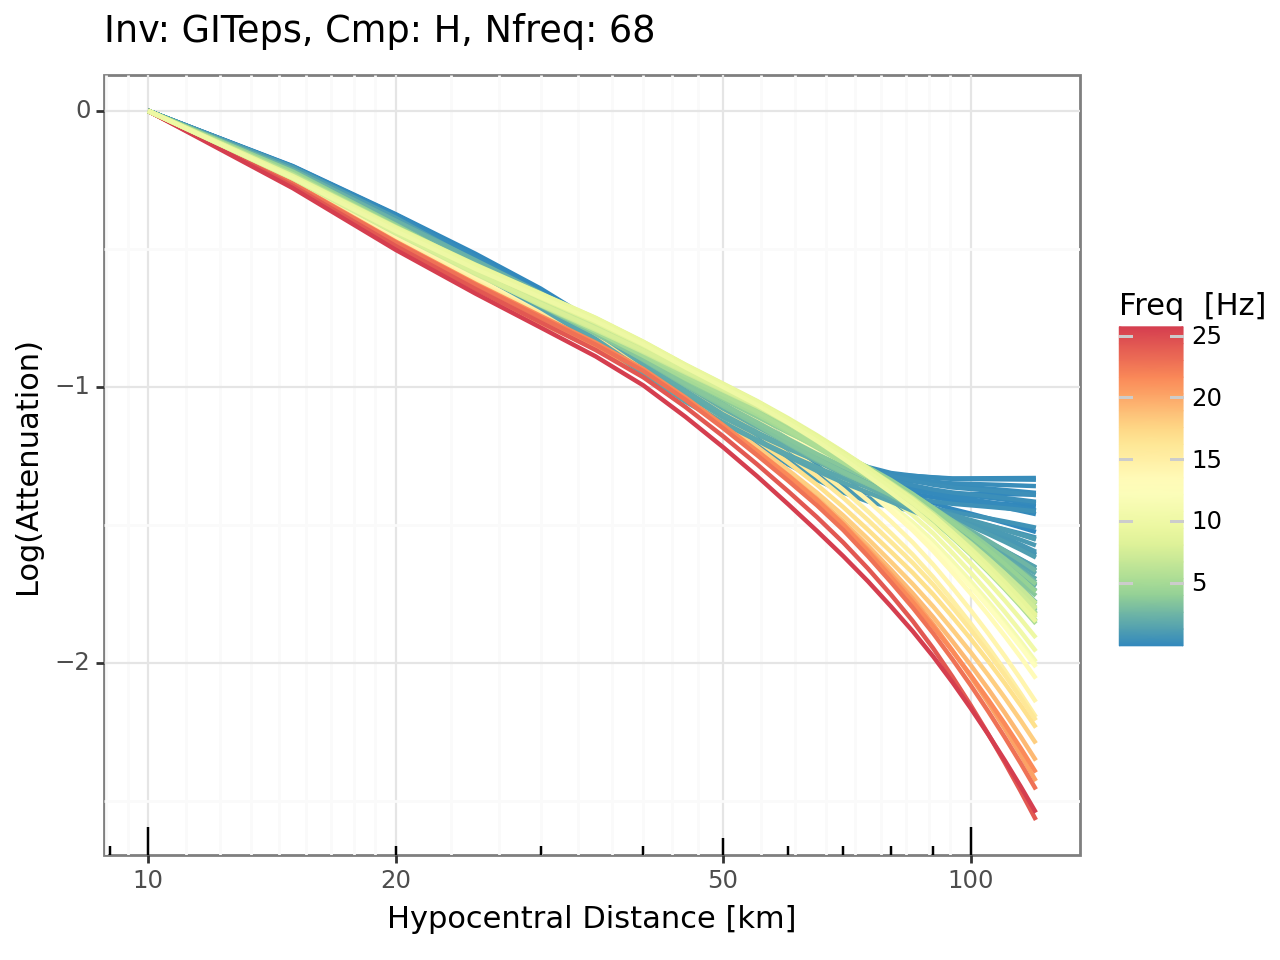


  WARNING Out Dir:  /home/mariaclara/gitpy/GITOUT/SOURCES Exist! 
  Graphic file for sources:  /home/mariaclara/gitpy/GITOUT/GRAPH/Sources.jpg


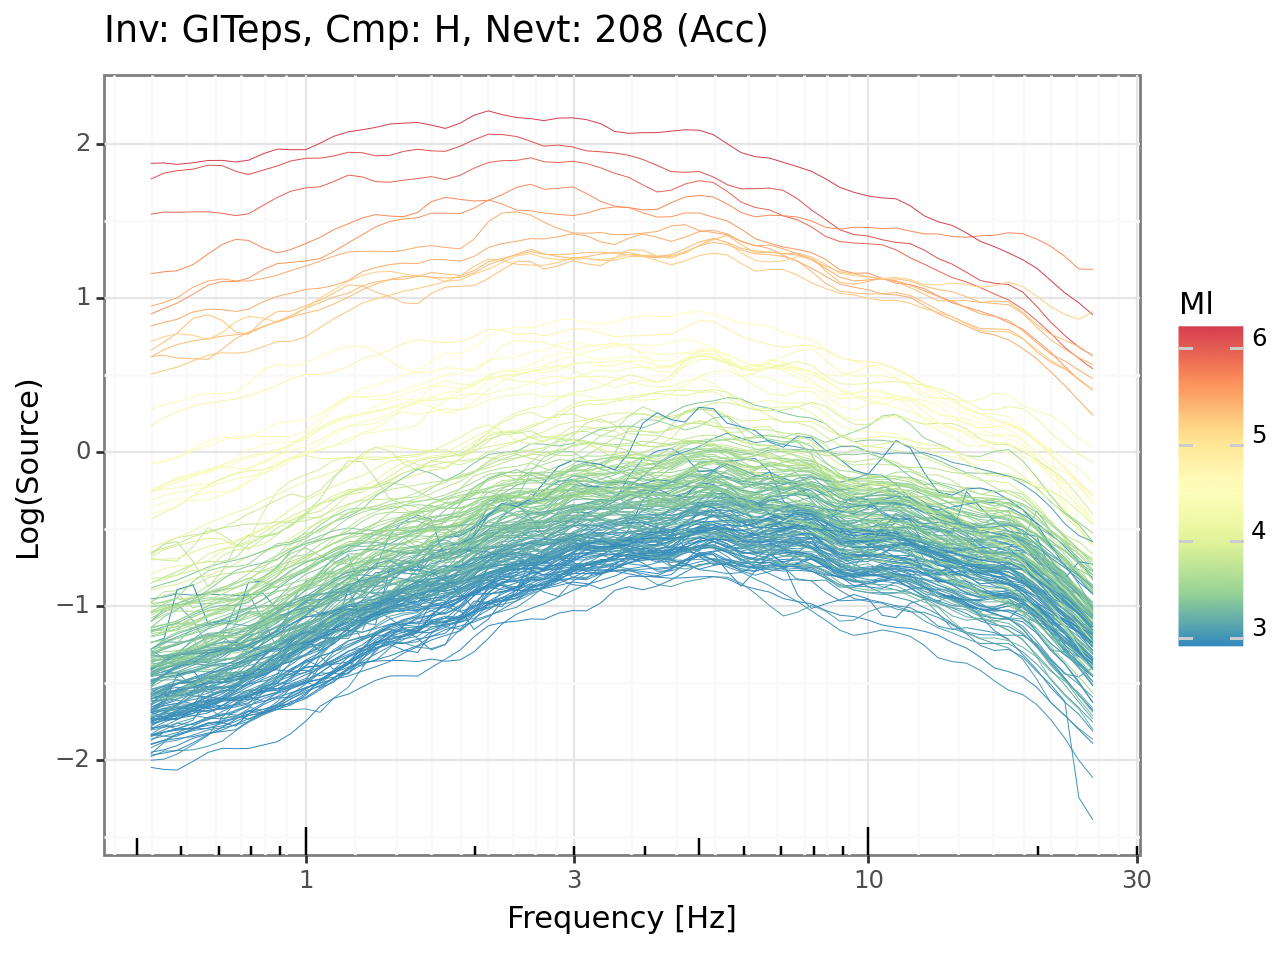


  WARNING Out Dir:  /home/mariaclara/gitpy/GITOUT/SITES Exist! 
  Graphic file for sites:  /home/mariaclara/gitpy/GITOUT/GRAPH/Sites.jpg


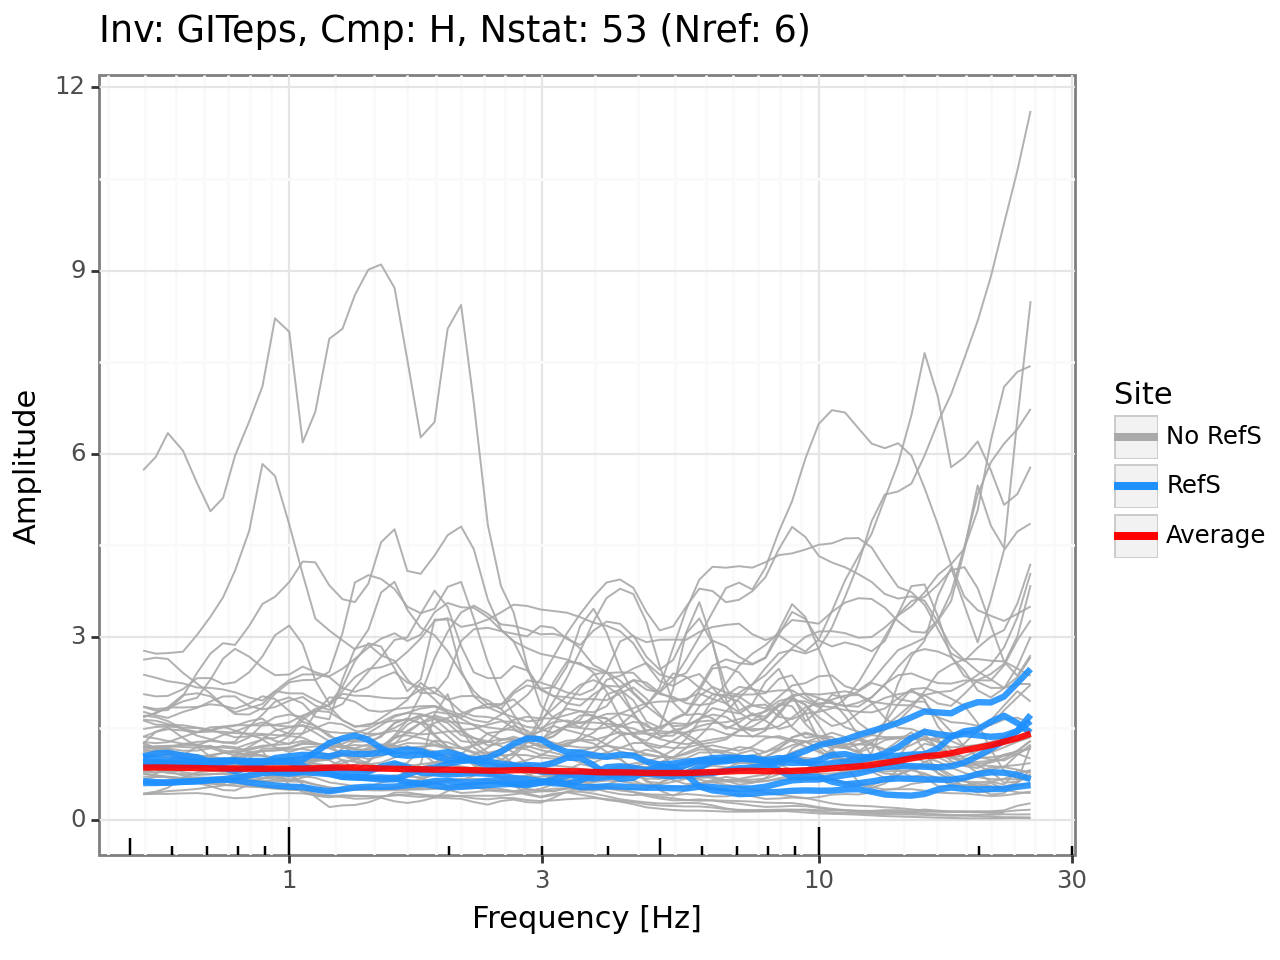


 ---------------------- GITeps, End computation: 06/06/2024 10:18:54 ---------


In [11]:
GitRes.WriteResults(cfg, log_file)
dt_string_end = now.strftime("%d/%m/%Y %H:%M:%S")
s1 = " ---------------------- GITeps, End computation: {:s} ---------".format(dt_string_end)
log_file.write(s1)
log_file.write("\n")
print(s1)
#log_file.close()    
GitRes.copy_log_conf(confF,cfg.out_dir + os.path.basename(configFile),confL,cfg.out_dir + os.path.basename(logFile))